# Evaluation of Binary Classifiers using ROC Curves and AUC

ROC == Receiver Operating Characterstic 

AUC == Area Under the Curve

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
student_df = pd.read_csv('student-mat.csv')

In [3]:
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [4]:
student_df.drop(['G1', 'G2'], axis=1, inplace=True)
student_df = student_df.select_dtypes(include=['number'])
student_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,4,11
1,17,1,1,1,2,0,5,3,3,1,1,3,2,11
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14
4,16,3,3,1,2,0,4,3,2,1,2,5,0,13


In [5]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         649 non-null    int64
 1   Medu        649 non-null    int64
 2   Fedu        649 non-null    int64
 3   traveltime  649 non-null    int64
 4   studytime   649 non-null    int64
 5   failures    649 non-null    int64
 6   famrel      649 non-null    int64
 7   freetime    649 non-null    int64
 8   goout       649 non-null    int64
 9   Dalc        649 non-null    int64
 10  Walc        649 non-null    int64
 11  health      649 non-null    int64
 12  absences    649 non-null    int64
 13  G3          649 non-null    int64
dtypes: int64(14)
memory usage: 71.1 KB


In [6]:
student_df['G3'].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

In [7]:
student_df['grade'] = pd.cut(student_df['G3'], [0, 12, 20], labels=['fail', 'pass'], include_lowest=True)
# 12 == fail (see data observation indexed by 2)

In [8]:
student_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G3,grade
0,18,4,4,2,2,0,4,3,4,1,1,3,4,11,fail
1,17,1,1,1,2,0,5,3,3,1,1,3,2,11,fail
2,15,1,1,1,2,0,4,3,2,2,3,3,6,12,fail
3,15,4,2,1,3,0,3,2,2,1,1,5,0,14,pass
4,16,3,3,1,2,0,4,3,2,1,2,5,0,13,pass


In [9]:
student_df.drop(['G3'], axis=1, inplace=True)

In [10]:
student_df

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,grade
0,18,4,4,2,2,0,4,3,4,1,1,3,4,fail
1,17,1,1,1,2,0,5,3,3,1,1,3,2,fail
2,15,1,1,1,2,0,4,3,2,2,3,3,6,fail
3,15,4,2,1,3,0,3,2,2,1,1,5,0,pass
4,16,3,3,1,2,0,4,3,2,1,2,5,0,pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,2,5,4,fail
645,18,3,1,1,2,0,4,3,4,1,1,1,4,pass
646,18,1,1,2,2,0,1,1,1,1,1,5,6,fail
647,17,3,1,2,1,0,2,4,5,3,4,2,6,fail


In [11]:
student_df.grade.value_counts()

fail    373
pass    276
Name: grade, dtype: int64

In [12]:
X = student_df[student_df.columns[:-1]]
y = student_df['grade']   

In [13]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)

In [14]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_valid)

y_pred

array(['fail', 'pass', 'fail', 'pass', 'pass', 'pass', 'fail', 'pass',
       'pass', 'pass', 'fail', 'pass', 'fail', 'pass', 'fail', 'fail',
       'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'pass', 'pass',
       'fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'pass', 'fail',
       'pass', 'fail', 'pass', 'fail', 'fail', 'fail', 'fail', 'pass',
       'fail', 'fail', 'fail', 'pass', 'pass', 'pass', 'fail', 'pass',
       'fail', 'fail', 'fail', 'fail', 'pass', 'fail', 'pass', 'fail',
       'pass', 'fail', 'pass', 'pass', 'pass', 'fail', 'pass', 'fail',
       'fail', 'fail', 'pass', 'pass', 'fail', 'pass', 'fail', 'pass',
       'pass', 'pass', 'fail', 'pass', 'pass', 'fail', 'fail', 'fail',
       'fail', 'fail', 'pass', 'fail', 'fail', 'pass', 'fail', 'fail',
       'fail', 'pass', 'pass', 'pass', 'fail', 'pass', 'pass', 'pass',
       'pass', 'fail', 'fail', 'fail', 'fail', 'fail', 'fail', 'pass',
       'fail', 'fail', 'pass', 'pass', 'pass', 'pass', 'fail', 'pass',
      

---

$precision = \frac{TP}{TP + FP}$    

$recall = \frac{TP}{TP+FN}$

---

In [15]:
y_pred_prob = model.predict_proba(X_valid)
y_pred_prob

# default threshold is 0.5

array([[0.85, 0.15],
       [0.39, 0.61],
       [0.9 , 0.1 ],
       [0.23, 0.77],
       [0.28, 0.72],
       [0.41, 0.59],
       [0.51, 0.49],
       [0.39, 0.61],
       [0.1 , 0.9 ],
       [0.41, 0.59],
       [0.6 , 0.4 ],
       [0.26, 0.74],
       [0.56, 0.44],
       [0.38, 0.62],
       [0.58, 0.42],
       [0.63, 0.37],
       [0.51, 0.49],
       [0.76, 0.24],
       [0.69, 0.31],
       [0.84, 0.16],
       [0.84, 0.16],
       [0.88, 0.12],
       [0.17, 0.83],
       [0.27, 0.73],
       [0.72, 0.28],
       [0.39, 0.61],
       [0.22, 0.78],
       [0.46, 0.54],
       [0.35, 0.65],
       [0.62, 0.38],
       [0.48, 0.52],
       [1.  , 0.  ],
       [0.44, 0.56],
       [0.5 , 0.5 ],
       [0.45, 0.55],
       [0.72, 0.28],
       [0.75, 0.25],
       [0.61, 0.39],
       [0.65, 0.35],
       [0.36, 0.64],
       [0.66, 0.34],
       [0.5 , 0.5 ],
       [0.87, 0.13],
       [0.27, 0.73],
       [0.49, 0.51],
       [0.48, 0.52],
       [0.92, 0.08],
       [0.33,

In [16]:
FPR, TPR, threshold = roc_curve(y_valid, y_pred_prob[:,1], pos_label="pass")  

In [17]:
pd.DataFrame(data = (FPR, TPR, threshold), index = ['FPR', 'TPR', 'Threshold' ]).T

,FPR,TPR,Threshold
0,0.000000,0.000000,1.96
1,0.013333,0.000000,0.96
2,0.013333,0.054545,0.91
3,0.026667,0.090909,0.90
4,0.040000,0.090909,0.89
5,0.053333,0.109091,0.86
6,0.066667,0.109091,0.83
7,0.066667,0.127273,0.81
8,0.066667,0.163636,0.78
9,0.066667,0.181818,0.77


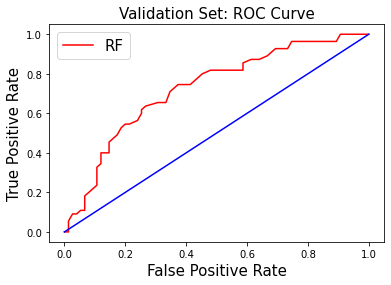

In [18]:
plt.plot(FPR, TPR, color = 'red', label='RF')

plt.plot([0, 1], [0, 1], color='blue')

plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Validation Set: ROC Curve', fontsize=15)
plt.legend(fontsize=15);

In [19]:
roc_auc_score(y_valid, y_pred_prob[:,1])  # AUC score

0.7260606060606061

In [20]:
classifiers = {'LogReg' : LogisticRegression(),
               'MLP' : MLPClassifier(),
               'K-NN' : KNeighborsClassifier(),
               'DTree' : DecisionTreeClassifier(),
               'RF' : RandomForestClassifier(),
               'SVM' : SVC(probability = True),
               'NB' : GaussianNB()}  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


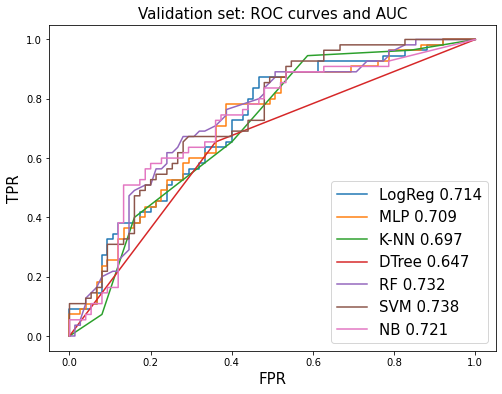

In [21]:
plt.figure(figsize = (8, 6))

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_valid_prob = model.predict_proba(X_valid)
    FPR, TPR, threshold = roc_curve(y_valid, y_valid_prob[:,1], pos_label="pass")
    auc = roc_auc_score(y_valid, y_valid_prob[:,1])
    plot_label = "{} {:.3f}".format(name, auc)
    plt.plot(FPR, TPR, label=plot_label)

plt.xlabel('FPR', fontsize=15)
plt.ylabel('TPR', fontsize=15)
plt.title('Validation set: ROC curves and AUC', fontsize=15)
plt.legend(loc='lower right', fontsize=15);